## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import os

## Import Dataset

In [3]:
dataset_file = './Data_set/Data/T0_ID002838_Walk1.csv' 
dataset_id = os.path.basename(dataset_file).split('_')[1]
dataset = pd.read_csv(dataset_file, skiprows = 2, names=['Gx','Gy','Gz','Ax','Ay','Az'])
N = dataset['Ax'].size 

### Visual data

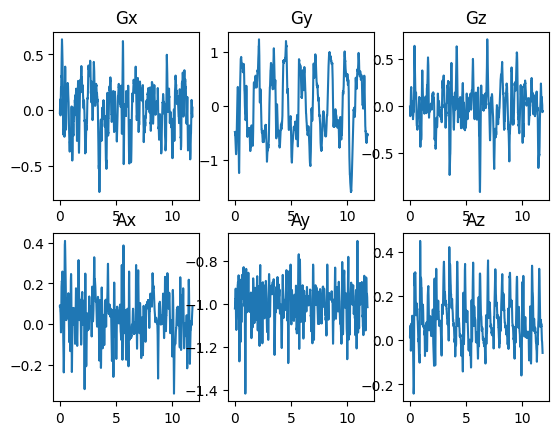

In [4]:
fig, ax = plt.subplots(nrows=2,
                       ncols=3,) 
t_step = 0.01
t = np.arange(0,(N-0.5)*t_step, t_step)

## Gx
Gx_y = dataset['Gx']
ax[0,0].set(title="Gx")
ax[0,0].plot(t, Gx_y);

## Gy
Gy_y = dataset['Gy']
ax[0,1].set(title="Gy")
ax[0,1].plot(t, Gy_y);

## Gz
Gz_y = dataset['Gz']
ax[0,2].set(title="Gz")
ax[0,2].plot(t, Gz_y);

## Ax
Ax_y = dataset['Ax']
ax[1,0].set(title="Ax")
ax[1,0].plot(t, Ax_y);

## Ay
Ay_y = dataset['Ay']
ax[1,1].set(title="Ay")
ax[1,1].plot(t, Ay_y);

## Az
Az_y = dataset['Az']
ax[1,2].set(title="Az")
ax[1,2].plot(t, Az_y);



#### Fourier Tranform 

c:\Users\ntdnd\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Vị trí của phần tử có tần số 50: [296]


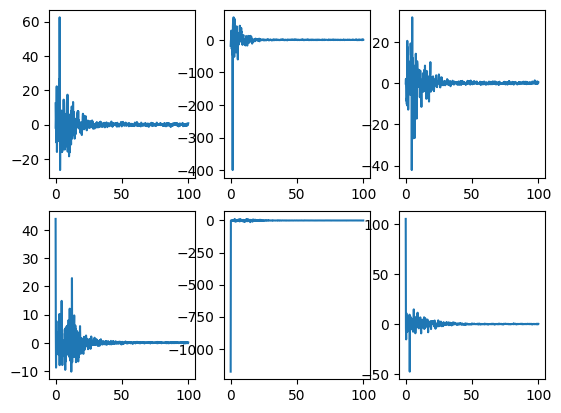

In [5]:
fig, ax = plt.subplots(nrows=2,
                       ncols=3,)
##F_max = 1/t_step
##F = np.linspace(0,F_max,N)

## Gx
Gx = np.fft.fft(Gx_y)
Gx_plot = Gx[0:int(t.size/2+1)]
t_plot = np.linspace(0, 100, Gx_plot.size)
ax[0,0].plot(t_plot, Gx_plot);

## Gy
Gy = np.fft.fft(Gy_y)
Gy_plot = Gy[0:int(t.size/2+1)]
t_plot = np.linspace(0, 100, Gy_plot.size)
ax[0,1].plot(t_plot, Gy_plot);

## Gz
Gz = np.fft.fft(Gz_y)
Gz_plot = Gz[0:int(t.size/2+1)]
t_plot = np.linspace(0, 100, Gz_plot.size)
ax[0,2].plot(t_plot, Gz_plot);

## Ax
Ax = np.fft.fft(Ax_y)
Ax_plot = Ax[0:int(t.size/2+1)]
t_plot = np.linspace(0, 100, Ax_plot.size)
ax[1,0].plot(t_plot, Ax_plot);

## Ay
Ay = np.fft.fft(Ay_y)
Ay_plot = Ay[0:int(t.size/2+1)]
t_plot = np.linspace(0, 100, Ay_plot.size)
ax[1,1].plot(t_plot, Ay_plot);

## Az
Az = np.fft.fft(Az_y)
Az_plot = Az[0:int(t.size/2+1)]
t_plot = np.linspace(0, 100, Az_plot.size)
ax[1,2].plot(t_plot, Az_plot);

frequency = 50  # Tần số cần tìm

# Tìm vị trí của phần tử trong mảng t_plot có giá trị bằng frequency
indices = np.where(t_plot == frequency)[0]

if len(indices) == 0:
    # Tìm vị trí của phần tử gần nhất với hoặc bằng frequency trong mảng t_plot
    closest_index = np.argmin(np.abs(t_plot - frequency))
    indices = np.append(indices, closest_index)  # Thêm closest_index vào indices
    print("Vị trí của phần tử gần 50:", indices)

else:
    # In ra vị trí của các phần tử có tần số bằng frequency
    print("Vị trí của phần tử có tần số 50:", indices)



#### Clear noise

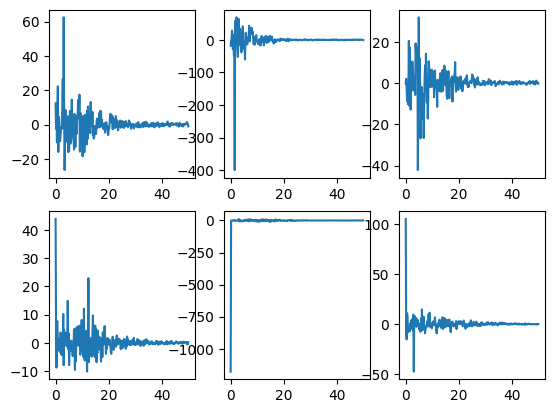

In [6]:
fig, ax = plt.subplots(nrows=2,
                       ncols=3,)
# Thiết kế bộ lọc thông thấp
cutoff_frequency = indices[0]  # Tần số cắt (cutoff frequency)

# Áp dụng bộ lọc
filtered_Gx = Gx_plot[0:cutoff_frequency]
filtered_Gy = Gy_plot[0:cutoff_frequency]
filtered_Gz = Gz_plot[0:cutoff_frequency]
filtered_Ax = Ax_plot[0:cutoff_frequency]
filtered_Ay = Ay_plot[0:cutoff_frequency]
filtered_Az = Az_plot[0:cutoff_frequency]

t_plot2 = np.linspace(0, 50, filtered_Gx.size)

# Vẽ biểu đồ tín hiệu đã lọc
ax[0, 0].plot(t_plot2, filtered_Gx)
ax[0, 1].plot(t_plot2, filtered_Gy)
ax[0, 2].plot(t_plot2, filtered_Gz)
ax[1, 0].plot(t_plot2, filtered_Ax)
ax[1, 1].plot(t_plot2, filtered_Ay)
ax[1, 2].plot(t_plot2, filtered_Az)

### Output Data

In [7]:
"""
df = pd.DataFrame({
    'Gx': np.real(filtered_Gx),
    'Gy': np.real(filtered_Gy),
    'Gz': np.real(filtered_Gz),
    'Ax': np.real(filtered_Ax),
    'Ay': np.real(filtered_Ay),
    'Az': np.real(filtered_Az)

    #'Gx': filtered_Gx.astype(complex),
    #'Gy': filtered_Gy.astype(complex),
    #'Gz': filtered_Gz.astype(complex),
    #'Ax': filtered_Ax.astype(complex),
    #'Ay': filtered_Ay.astype(complex),
    #'Az': filtered_Az.astype(complex)
})
"""
df = pd.DataFrame({
    'Gx': filtered_Gx.astype(complex),
    'Gy': filtered_Gy.astype(complex),
    'Gz': filtered_Gz.astype(complex),
    'Ax': filtered_Ax.astype(complex),
    'Ay': filtered_Ay.astype(complex),
    'Az': filtered_Az.astype(complex)
})

# # Biến đổi số phức thành số thực
# df = df.apply(np.real)
# # Đường dẫn thư mục tùy ý
# folder_path = './Data_set/Data_train/'
# output_file = os.path.join(folder_path, dataset_id + '_Walk1_1.csv')

# # Xuất DataFrame vào file Excel
# df.to_csv(output_file, index=False)